In [203]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [204]:
# Checking my current directory
import os
print(os.getcwd())

C:\Users\prati\AI\MACHINE LEARNING\ALL_ALGORITHMS


In [205]:
#checking the list of directories
os.listdir()

['.ipynb_checkpoints',
 'Property_data_Linear_Reg.csv',
 'Property_Price_Prediction.ipynb']

# Basic Steps

In [207]:
data = pd.read_csv('Property_data_Linear_Reg.csv')

In [208]:
pd.set_option('display.max_columns', None) # this shows all columns in table

In [209]:
data

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,NaN,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,20,FVR,62.0,7500,Paved,Paved,Reg,Lvl,AllPub,I,GS,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,SS,VinylSd,VinylSd,NaN,0.0,Gd,TA,PC,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,Ex,Y,SBrkr,1221,0,0,1221,1,0,2,0,2,1,Gd,6,TF,0,NaN,Attchd,2004.0,RFn,2,689.060909,TA,TA,Y,-9.973961,-9.267967,126.676547,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000
1455,1456,60,RLD,62.0,7917,Paved,NaN,Reg,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,SS,VinylSd,VinylSd,NaN,0.0,TA,TA,PC,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,TF,1,TA,Attchd,1999.0,RFn,2,644.100240,TA,TA,Y,-80.348891,113.043436,125.521880,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RLD,85.0,13175,Pa

In [210]:
data.Brick_Veneer_Area.values

array([196.,   0., 162., ..., 119.,   0.,   0.])

# Data Cleaning/Preprosessing

In [212]:
data.columns

Index(['Id', 'Building_Class', 'Zoning_Class', 'Lot_Extent', 'Lot_Size',
       'Road_Type', 'Lane_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design',
       'Overall_Material', 'House_Condition', 'Construction_Year',
       'Remodel_Year', 'Roof_Design', 'Roof_Quality', 'Exterior1st',
       'Exterior2nd', 'Brick_Veneer_Type', 'Brick_Veneer_Area',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'Total_Basement_Area', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'First_Floor_Area',
       'Second_Floor_Area', 'LowQualFinSF', 'Grade_Living_Area',
       'Underground_Full_Bathroom', 'Underground_Half_Bathroom',
       'Full_Bathroom_Above_Grade', 'Ha

In [213]:
data['Property_age'] = data['Remodel_Year'] - data['Construction_Year']

In [214]:
data['Total_living_area'] = data['Total_Basement_Area'] + data['Grade_Living_Area'] + data['First_Floor_Area'] + data['Second_Floor_Area']

In [215]:
# Display important Columns
new_data = data[['Building_Class', 'Lot_Size', 'Neighborhood', 'Overall_Material', 'House_Type', 'House_Condition', 'Property_Shape', 'Property_age', 'Kitchen_Quality', 'House_Design', 'Air_Conditioning', 'Total_living_area', 'Garage_Area', 'Sale_Condition', 'Sale_Price']]
print(new_data.shape[1])

15


In [216]:
new_data.head(5)

,Building_Class,Lot_Size,Neighborhood,Overall_Material,House_Type,House_Condition,Property_Shape,Property_age,Kitchen_Quality,House_Design,Air_Conditioning,Total_living_area,Garage_Area,Sale_Condition,Sale_Price
0,60,8450,CollgCr,7,1Fam,5,Reg,0,Gd,2Story,Y,4276,1085.793744,Normal,208500
1,20,9600,Veenker,6,1Fam,8,Reg,0,TA,1Story,Y,3786,196.316304,Normal,181500
2,60,11250,CollgCr,7,1Fam,5,IR1,1,Gd,2Story,Y,4492,218.068403,Normal,223500
3,70,9550,Crawfor,7,1Fam,5,IR1,55,Gd,2Story,Y,4190,696.996439,Abnorml,140000
4,60,14260,NoRidge,8,1Fam,5,IR1,0,Gd,2Story,Y,5541,568.859882,Normal,250000


In [217]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Building_Class     1459 non-null   int64  
 1   Lot_Size           1459 non-null   int64  
 2   Neighborhood       1459 non-null   object 
 3   Overall_Material   1459 non-null   int64  
 4   House_Type         1459 non-null   object 
 5   House_Condition    1459 non-null   int64  
 6   Property_Shape     1459 non-null   object 
 7   Property_age       1459 non-null   int64  
 8   Kitchen_Quality    1459 non-null   object 
 9   House_Design       1459 non-null   object 
 10  Air_Conditioning   1459 non-null   object 
 11  Total_living_area  1459 non-null   int64  
 12  Garage_Area        1459 non-null   float64
 13  Sale_Condition     1459 non-null   object 
 14  Sale_Price         1459 non-null   int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 171.1+ KB


In [218]:
new_data['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [219]:
new_data['Kitchen_Quality'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [220]:
new_data['Air_Conditioning'].unique()

array(['Y', 'N'], dtype=object)

In [221]:
new_data['House_Type'].unique()

array(['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs'], dtype=object)

In [222]:
new_data['Property_Shape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [223]:
new_data['House_Design'].unique()

array(['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [224]:
new_data['Sale_Condition'].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

# EDA

In [226]:
## step 1: Finding missing values
new_data.isnull().sum()

Building_Class       0
Lot_Size             0
Neighborhood         0
Overall_Material     0
House_Type           0
House_Condition      0
Property_Shape       0
Property_age         0
Kitchen_Quality      0
House_Design         0
Air_Conditioning     0
Total_living_area    0
Garage_Area          0
Sale_Condition       0
Sale_Price           0
dtype: int64

In [227]:
# step 2: Finding duplicate values
new_data.duplicated().sum()

0

In [228]:
# step 3: Convert categorical into numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_data['Air_Conditioning'] = le.fit_transform(new_data['Air_Conditioning']) 
new_data['Kitchen_Quality'] = le.fit_transform(new_data['Kitchen_Quality']) 
new_data['Neighborhood'] = le.fit_transform(new_data['Neighborhood']) 
new_data['House_Type'] = le.fit_transform(new_data['House_Type']) 
new_data['Property_Shape'] = le.fit_transform(new_data['Property_Shape']) 
new_data['House_Design'] = le.fit_transform(new_data['House_Design']) 
new_data['Sale_Condition'] = le.fit_transform(new_data['Sale_Condition'])

In [229]:
print(new_data.columns)

Index(['Building_Class', 'Lot_Size', 'Neighborhood', 'Overall_Material',
       'House_Type', 'House_Condition', 'Property_Shape', 'Property_age',
       'Kitchen_Quality', 'House_Design', 'Air_Conditioning',
       'Total_living_area', 'Garage_Area', 'Sale_Condition', 'Sale_Price'],
      dtype='object')


In [230]:
new_data.head(5)

,Building_Class,Lot_Size,Neighborhood,Overall_Material,House_Type,House_Condition,Property_Shape,Property_age,Kitchen_Quality,House_Design,Air_Conditioning,Total_living_area,Garage_Area,Sale_Condition,Sale_Price
0,60,8450,5,7,0,5,3,0,2,5,1,4276,1085.793744,4,208500
1,20,9600,24,6,0,8,3,0,3,2,1,3786,196.316304,4,181500
2,60,11250,5,7,0,5,0,1,2,5,1,4492,218.068403,4,223500
3,70,9550,6,7,0,5,0,55,2,5,1,4190,696.996439,0,140000
4,60,14260,15,8,0,5,0,0,2,5,1,5541,568.859882,4,250000


In [231]:
# step 4: Checking zeros

cols = [
    'Lot_Size', 'Neighborhood', 'Overall_Material', 'House_Condition',
    'House_Type', 'Kitchen_Quality', 'Property_Shape', 
    'House_Design', 'Air_Conditioning', 'Sale_Condition', 
    'Property_age', 'Total_living_area', 'Garage_Area', 'Sale_Price'
]

for col in cols:
    print((new_data[col] == 0).sum())

0
17
0
0
1219
100
484
154
95
101
763
0
0
0


In [232]:
# Treating zeros

median_value = new_data['Neighborhood'].median()
new_data['Neighborhood'] = new_data['Neighborhood'].replace(0, median_value)

median_value = new_data['Kitchen_Quality'].median()
new_data['Kitchen_Quality'] = new_data['Kitchen_Quality'].replace(0, median_value)

median_value = new_data.loc[new_data['House_Type'] != 0, 'House_Condition'].median()
new_data['House_Condition'] = new_data['House_Condition'].replace(0, median_value)

median_value = new_data['Air_Conditioning'].median()
new_data['Air_Conditioning'] = new_data['Air_Conditioning'].replace(0, median_value)

median_value = new_data.loc[new_data['House_Type'] != 0, 'House_Type'].median()
new_data['House_Type'] = new_data['House_Type'].replace(0, median_value)

median_value = new_data.loc[new_data['Property_Shape'] != 0, 'Property_Shape'].median()
new_data['Property_Shape'] = new_data['Property_Shape'].replace(0, median_value)

median_value = new_data.loc[new_data['House_Design'] != 0, 'House_Design'].median()
new_data['House_Design'] = new_data['House_Design'].replace(0, median_value)

median_value = new_data.loc[new_data['Sale_Condition'] != 0, 'Sale_Condition'].median()
new_data['Sale_Condition'] = new_data['Sale_Condition'].replace(0, median_value)

mean_value = new_data.loc[new_data['Property_age'] != 0, 'Property_age'].mean()
new_data['Property_age'] = new_data['Property_age'].replace(0, mean_value)

In [233]:
# Double run the checking zero cell to confirm zores removed or not
cols = [
    'Lot_Size', 'Neighborhood', 'Overall_Material', 'House_Condition',
    'House_Type', 'Kitchen_Quality', 'Property_Shape', 
    'House_Design', 'Air_Conditioning', 'Sale_Condition', 
    'Property_age', 'Total_living_area', 'Garage_Area', 'Sale_Price'
]

for col in cols:
    print((new_data[col] == 0).sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0


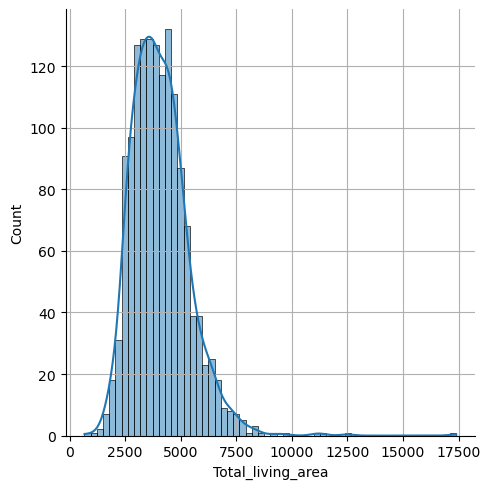

In [234]:
# Step 4: Analysis using plots
# 1- univariate Analysis(draw the graph for single column)

sns.displot(x=new_data.Total_living_area, kde=True) # kde shows line that the graph is uniformly distributed or not
plt.grid(True)

In [235]:
new_data['Total_living_area'] = np.log(new_data['Total_living_area'] + 5)

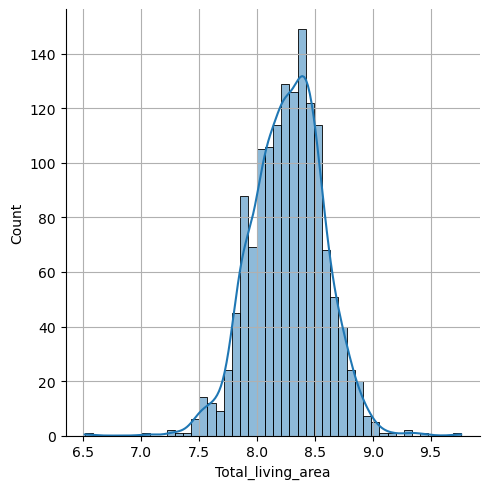

In [236]:
sns.displot(x=new_data.Total_living_area, kde=True) # kde shows line that the graph is uniformly distributed or not
plt.grid(True)

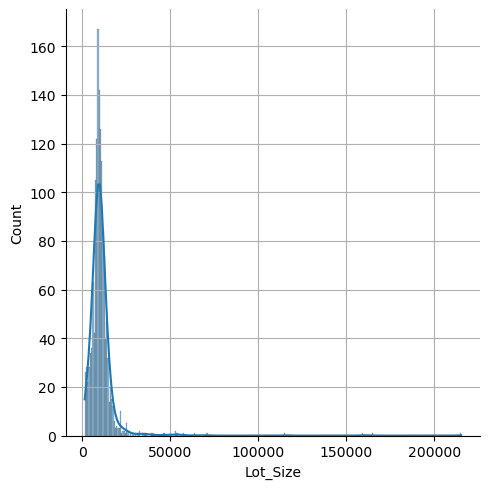

In [237]:
sns.displot(x=new_data.Lot_Size, kde=True)
plt.grid(True)

In [238]:
new_data['Lot_Size'] = np.log(new_data['Lot_Size'] + 1)

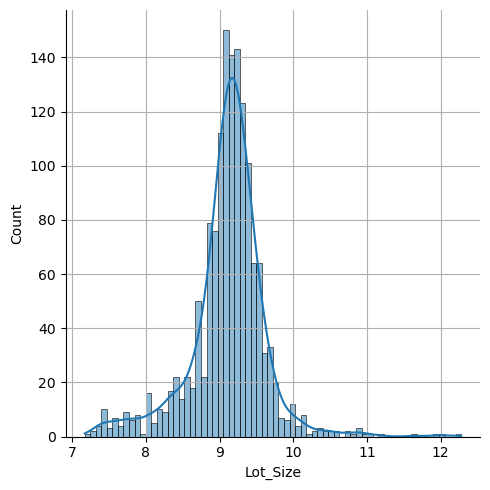

In [239]:
sns.displot(x=new_data.Lot_Size, kde=True)
plt.grid(True)

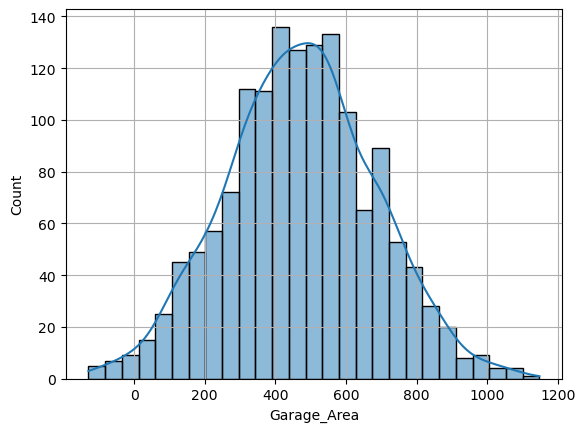

In [240]:
sns.histplot(x=new_data.Garage_Area, kde=True)
plt.grid(True)

In [241]:
# new_data['Garage_Area'].tolist() 
# To access all values in column we use this

In [242]:
(new_data['Garage_Area'] == 0).sum()

0

In [243]:
new_data['Garage_Area'].median()

471.0281158

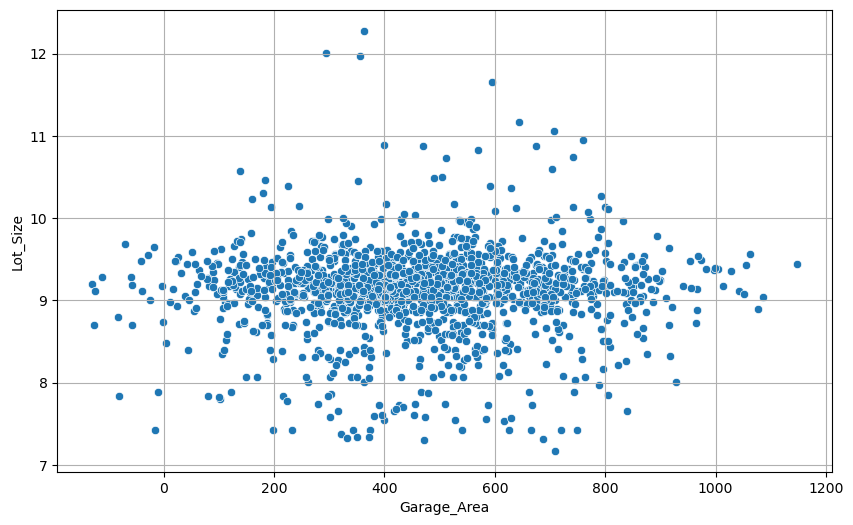

In [244]:
# 2 - Bivariate Analysis
# This step is performed when input variable and output variable are known.

plt.figure(figsize=(10,6))
sns.scatterplot(x=new_data.Garage_Area, y=new_data.Lot_Size, data=new_data, )
plt.grid(True)
plt.show()

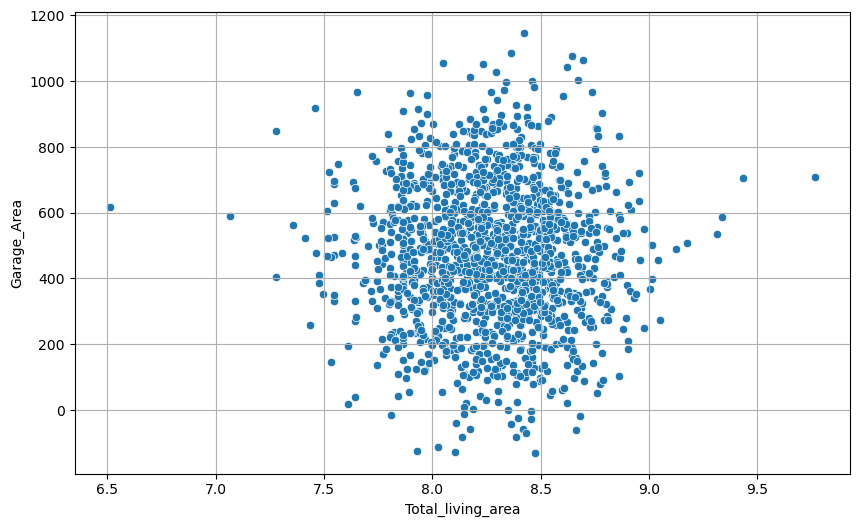

In [245]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=new_data.Total_living_area, y=new_data.Garage_Area, data=new_data, )
plt.grid(True)
plt.show() 

In [246]:
# 3 - multivariate analysis
# sns.pairplot(new_data) 
# Not able to understand behaviour of data because of multple graphs

In [247]:
new_data.head()

,Building_Class,Lot_Size,Neighborhood,Overall_Material,House_Type,House_Condition,Property_Shape,Property_age,Kitchen_Quality,House_Design,Air_Conditioning,Total_living_area,Garage_Area,Sale_Condition,Sale_Price
0,60,9.042040,5,7,3,5,3,28.524425,2,5,1,8.361942,1085.793744,4,208500
1,20,9.169623,24,6,3,8,3,28.524425,3,2,1,8.240385,196.316304,4,181500
2,60,9.328212,5,7,3,5,3,1.000000,2,5,1,8.411166,218.068403,4,223500
3,70,9.164401,6,7,3,5,3,55.000000,2,5,1,8.341649,696.996439,4,140000
4,60,9.565284,15,8,3,5,3,28.524425,2,5,1,8.620832,568.859882,4,250000


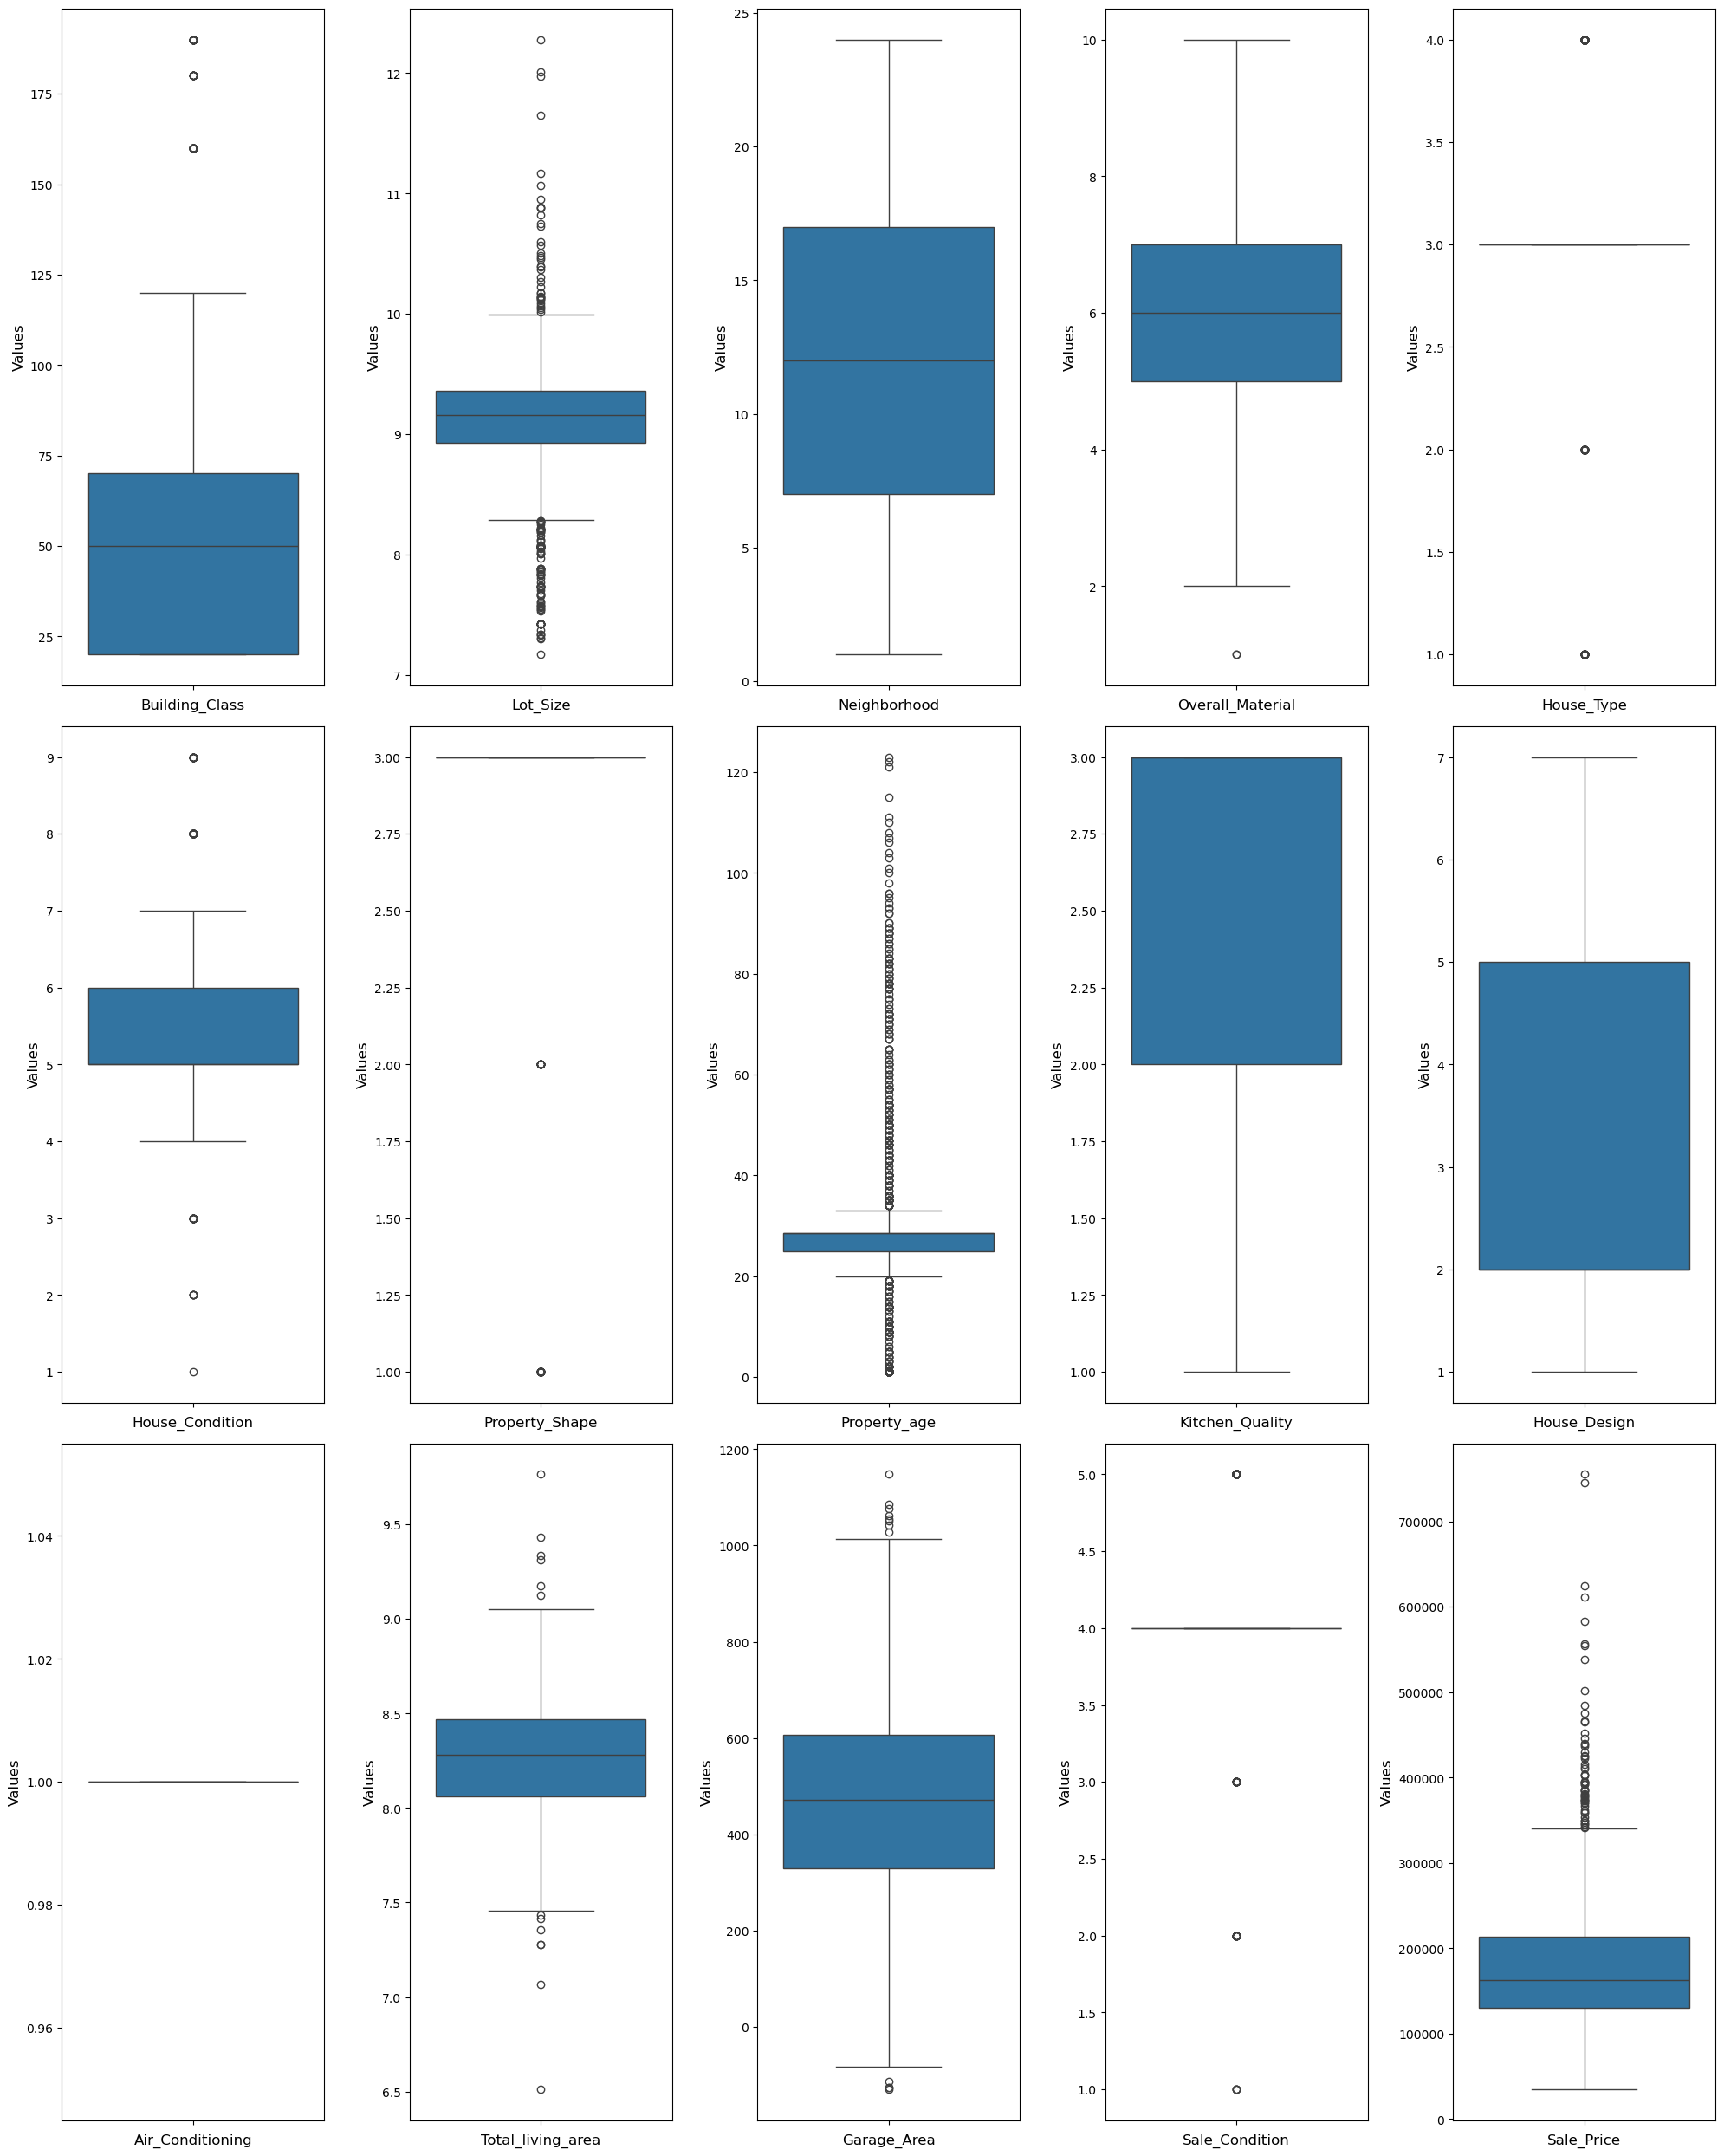

In [248]:
# step 5: check the outliers

plt.figure(figsize=(20, 25), facecolor='white') # set figure size + background color
plotnumber = 1 # initialize

for column in  new_data:
    if plotnumber <= 15: 
        ax = plt.subplot(3,5, plotnumber)
        sns.boxplot(y=new_data[column], ax=ax)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Values', fontsize=12)        
    plotnumber+=1
plt.tight_layout()
plt.show()

In [249]:
# Removing the outlier

def impute_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25) 
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median, df[column])
    return df

In [250]:
columns_to_impute = ['Lot_Size', 'Neighborhood', 'Overall_Material', 'House_Condition',
    'House_Type', 'Kitchen_Quality', 'Property_Shape', 
    'House_Design', 'Air_Conditioning', 'Sale_Condition', 
    'Property_age', 'Total_living_area', 'Garage_Area']

# Apply the function to each column
for col in columns_to_impute:
    df = impute_outliers_iqr(new_data, col)
df.head()

,Building_Class,Lot_Size,Neighborhood,Overall_Material,House_Type,House_Condition,Property_Shape,Property_age,Kitchen_Quality,House_Design,Air_Conditioning,Total_living_area,Garage_Area,Sale_Condition,Sale_Price
0,60,9.042040,5.0,7.0,3.0,5.0,3.0,28.524425,2.0,5.0,1.0,8.361942,471.028116,4.0,208500
1,20,9.169623,24.0,6.0,3.0,5.0,3.0,28.524425,3.0,2.0,1.0,8.240385,196.316304,4.0,181500
2,60,9.328212,5.0,7.0,3.0,5.0,3.0,28.524425,2.0,5.0,1.0,8.411166,218.068403,4.0,223500
3,70,9.164401,6.0,7.0,3.0,5.0,3.0,28.524425,2.0,5.0,1.0,8.341649,696.996439,4.0,140000
4,60,9.565284,15.0,8.0,3.0,5.0,3.0,28.524425,2.0,5.0,1.0,8.620832,568.859882,4.0,250000


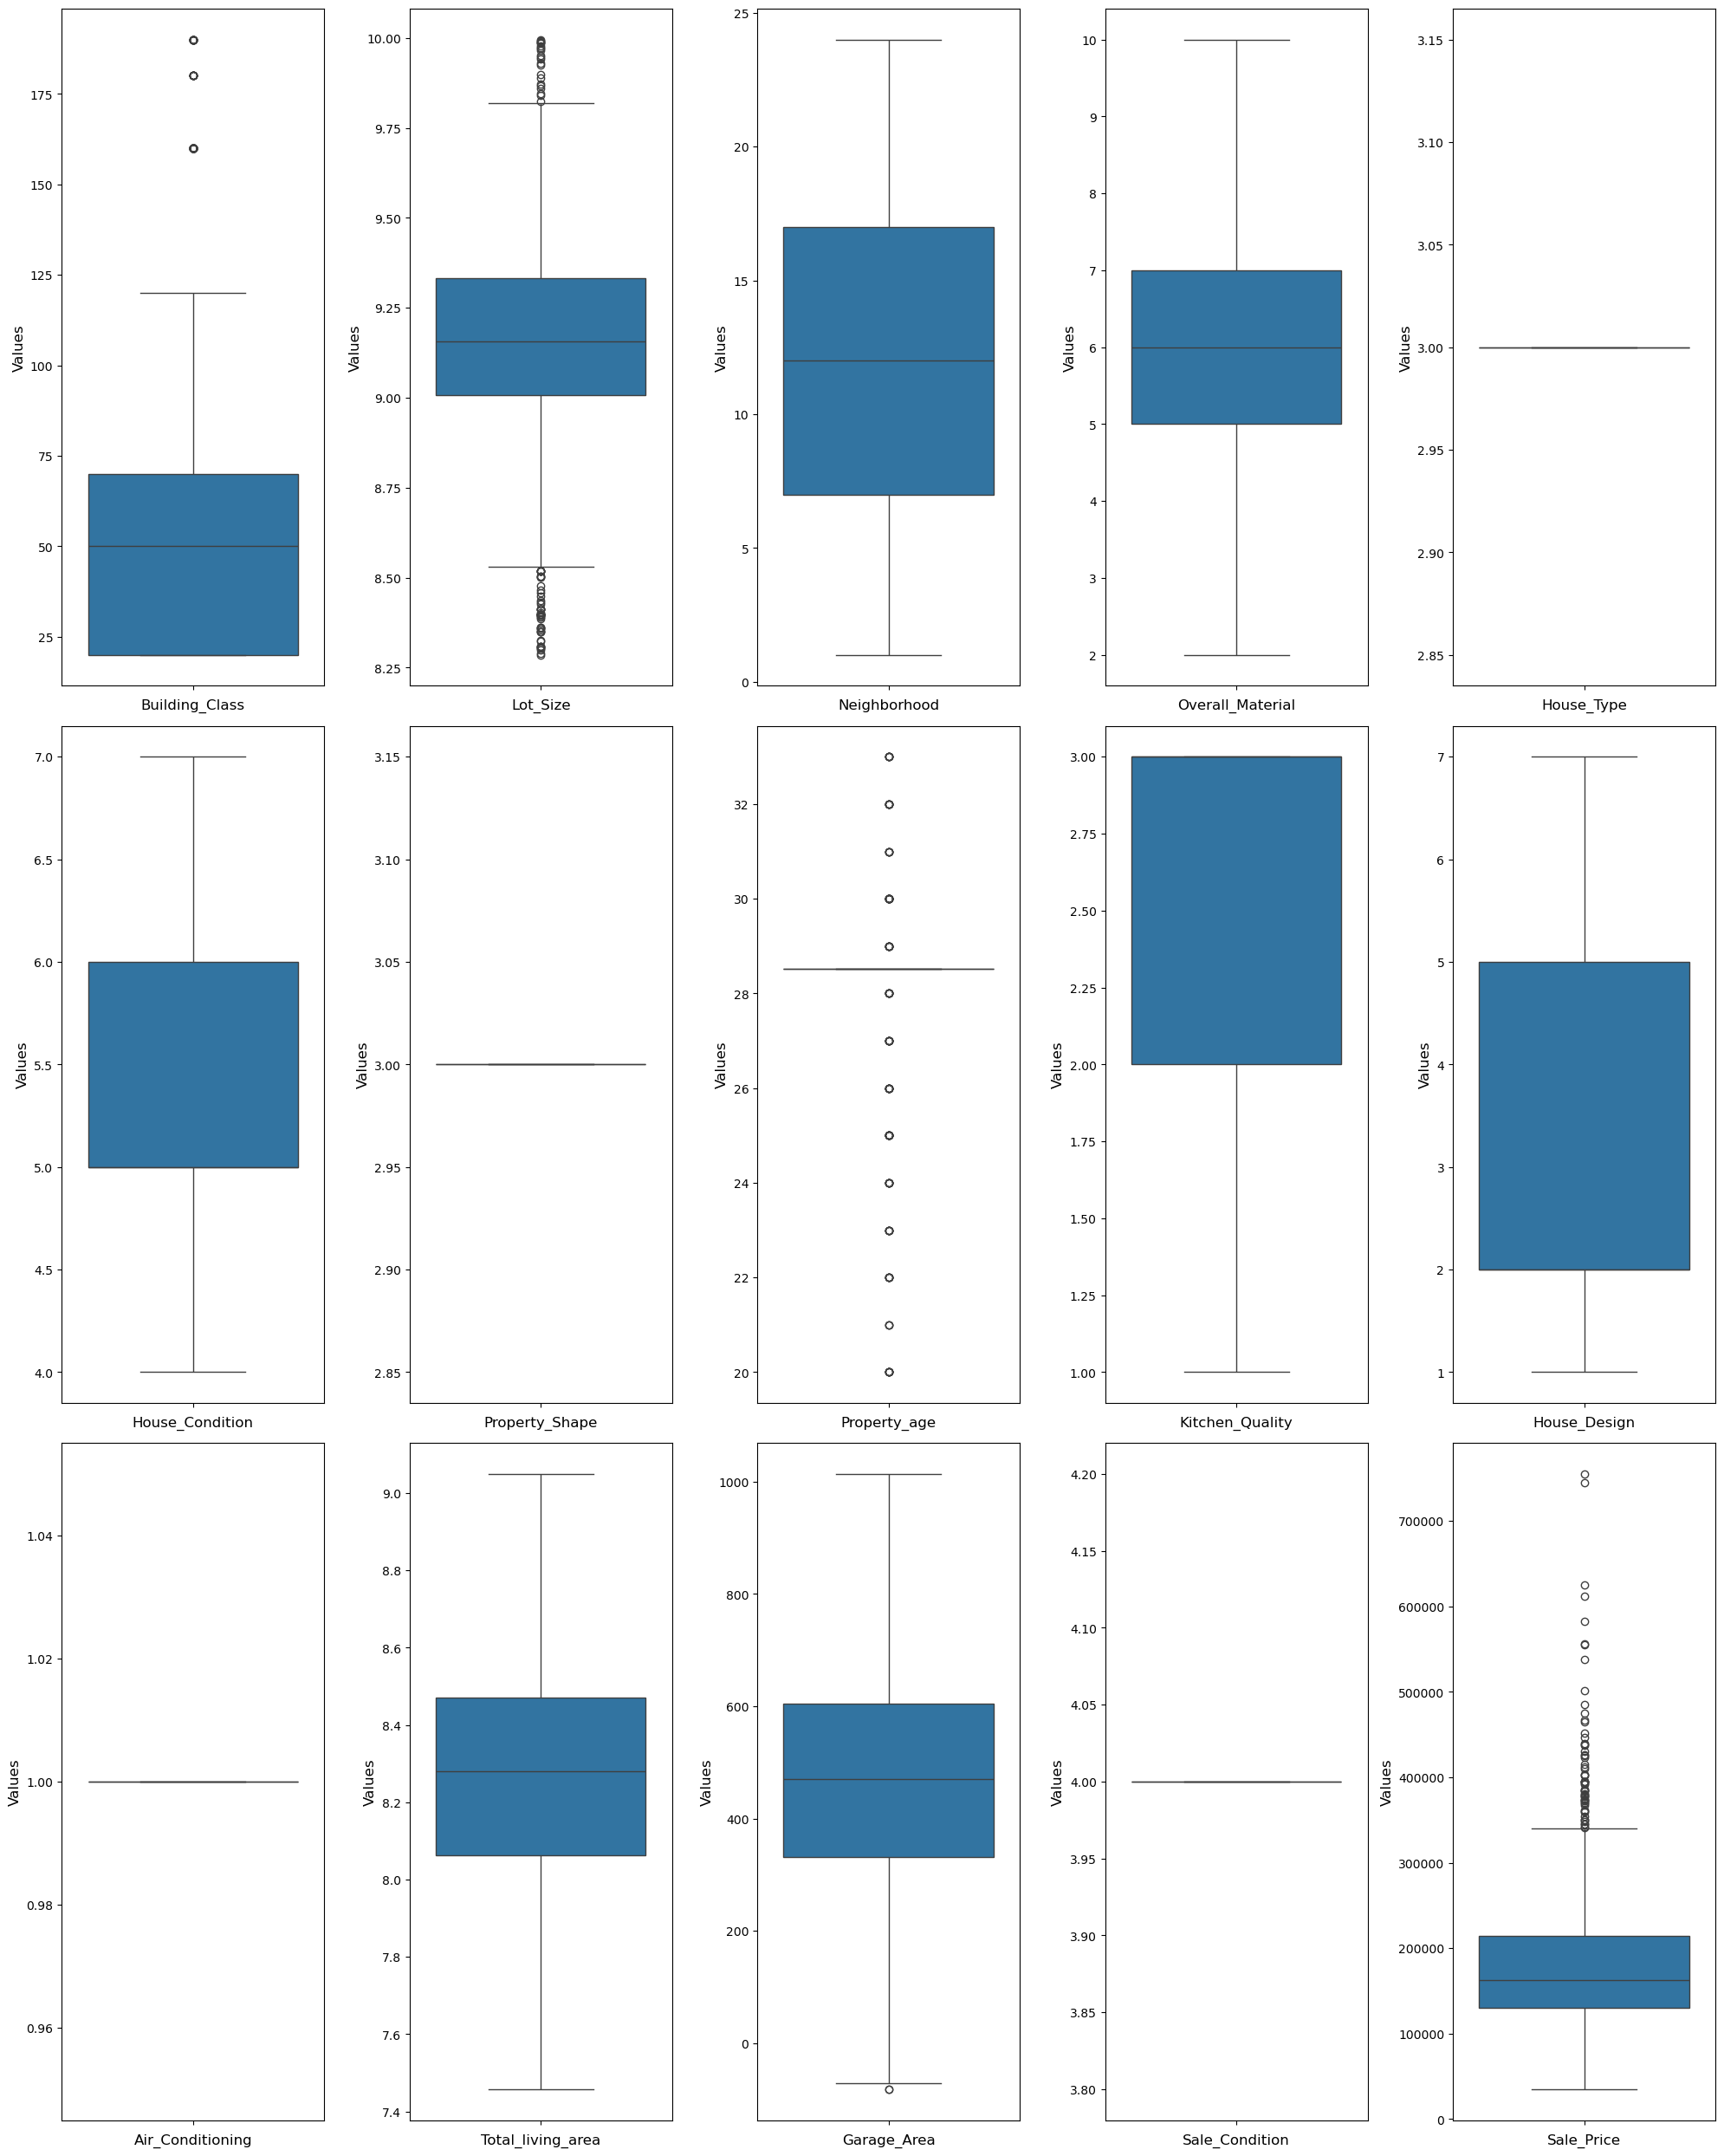

In [251]:
# After Applying IQR 

plt.figure(figsize=(20, 25), facecolor='white') # set figure size + background color
plotnumber = 1 # initialize

for column in  new_data:
    if plotnumber <= 15: 
        ax = plt.subplot(3,5, plotnumber)
        sns.boxplot(y=new_data[column], ax=ax)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Values', fontsize=12)        
    plotnumber+=1
plt.tight_layout()
plt.show()

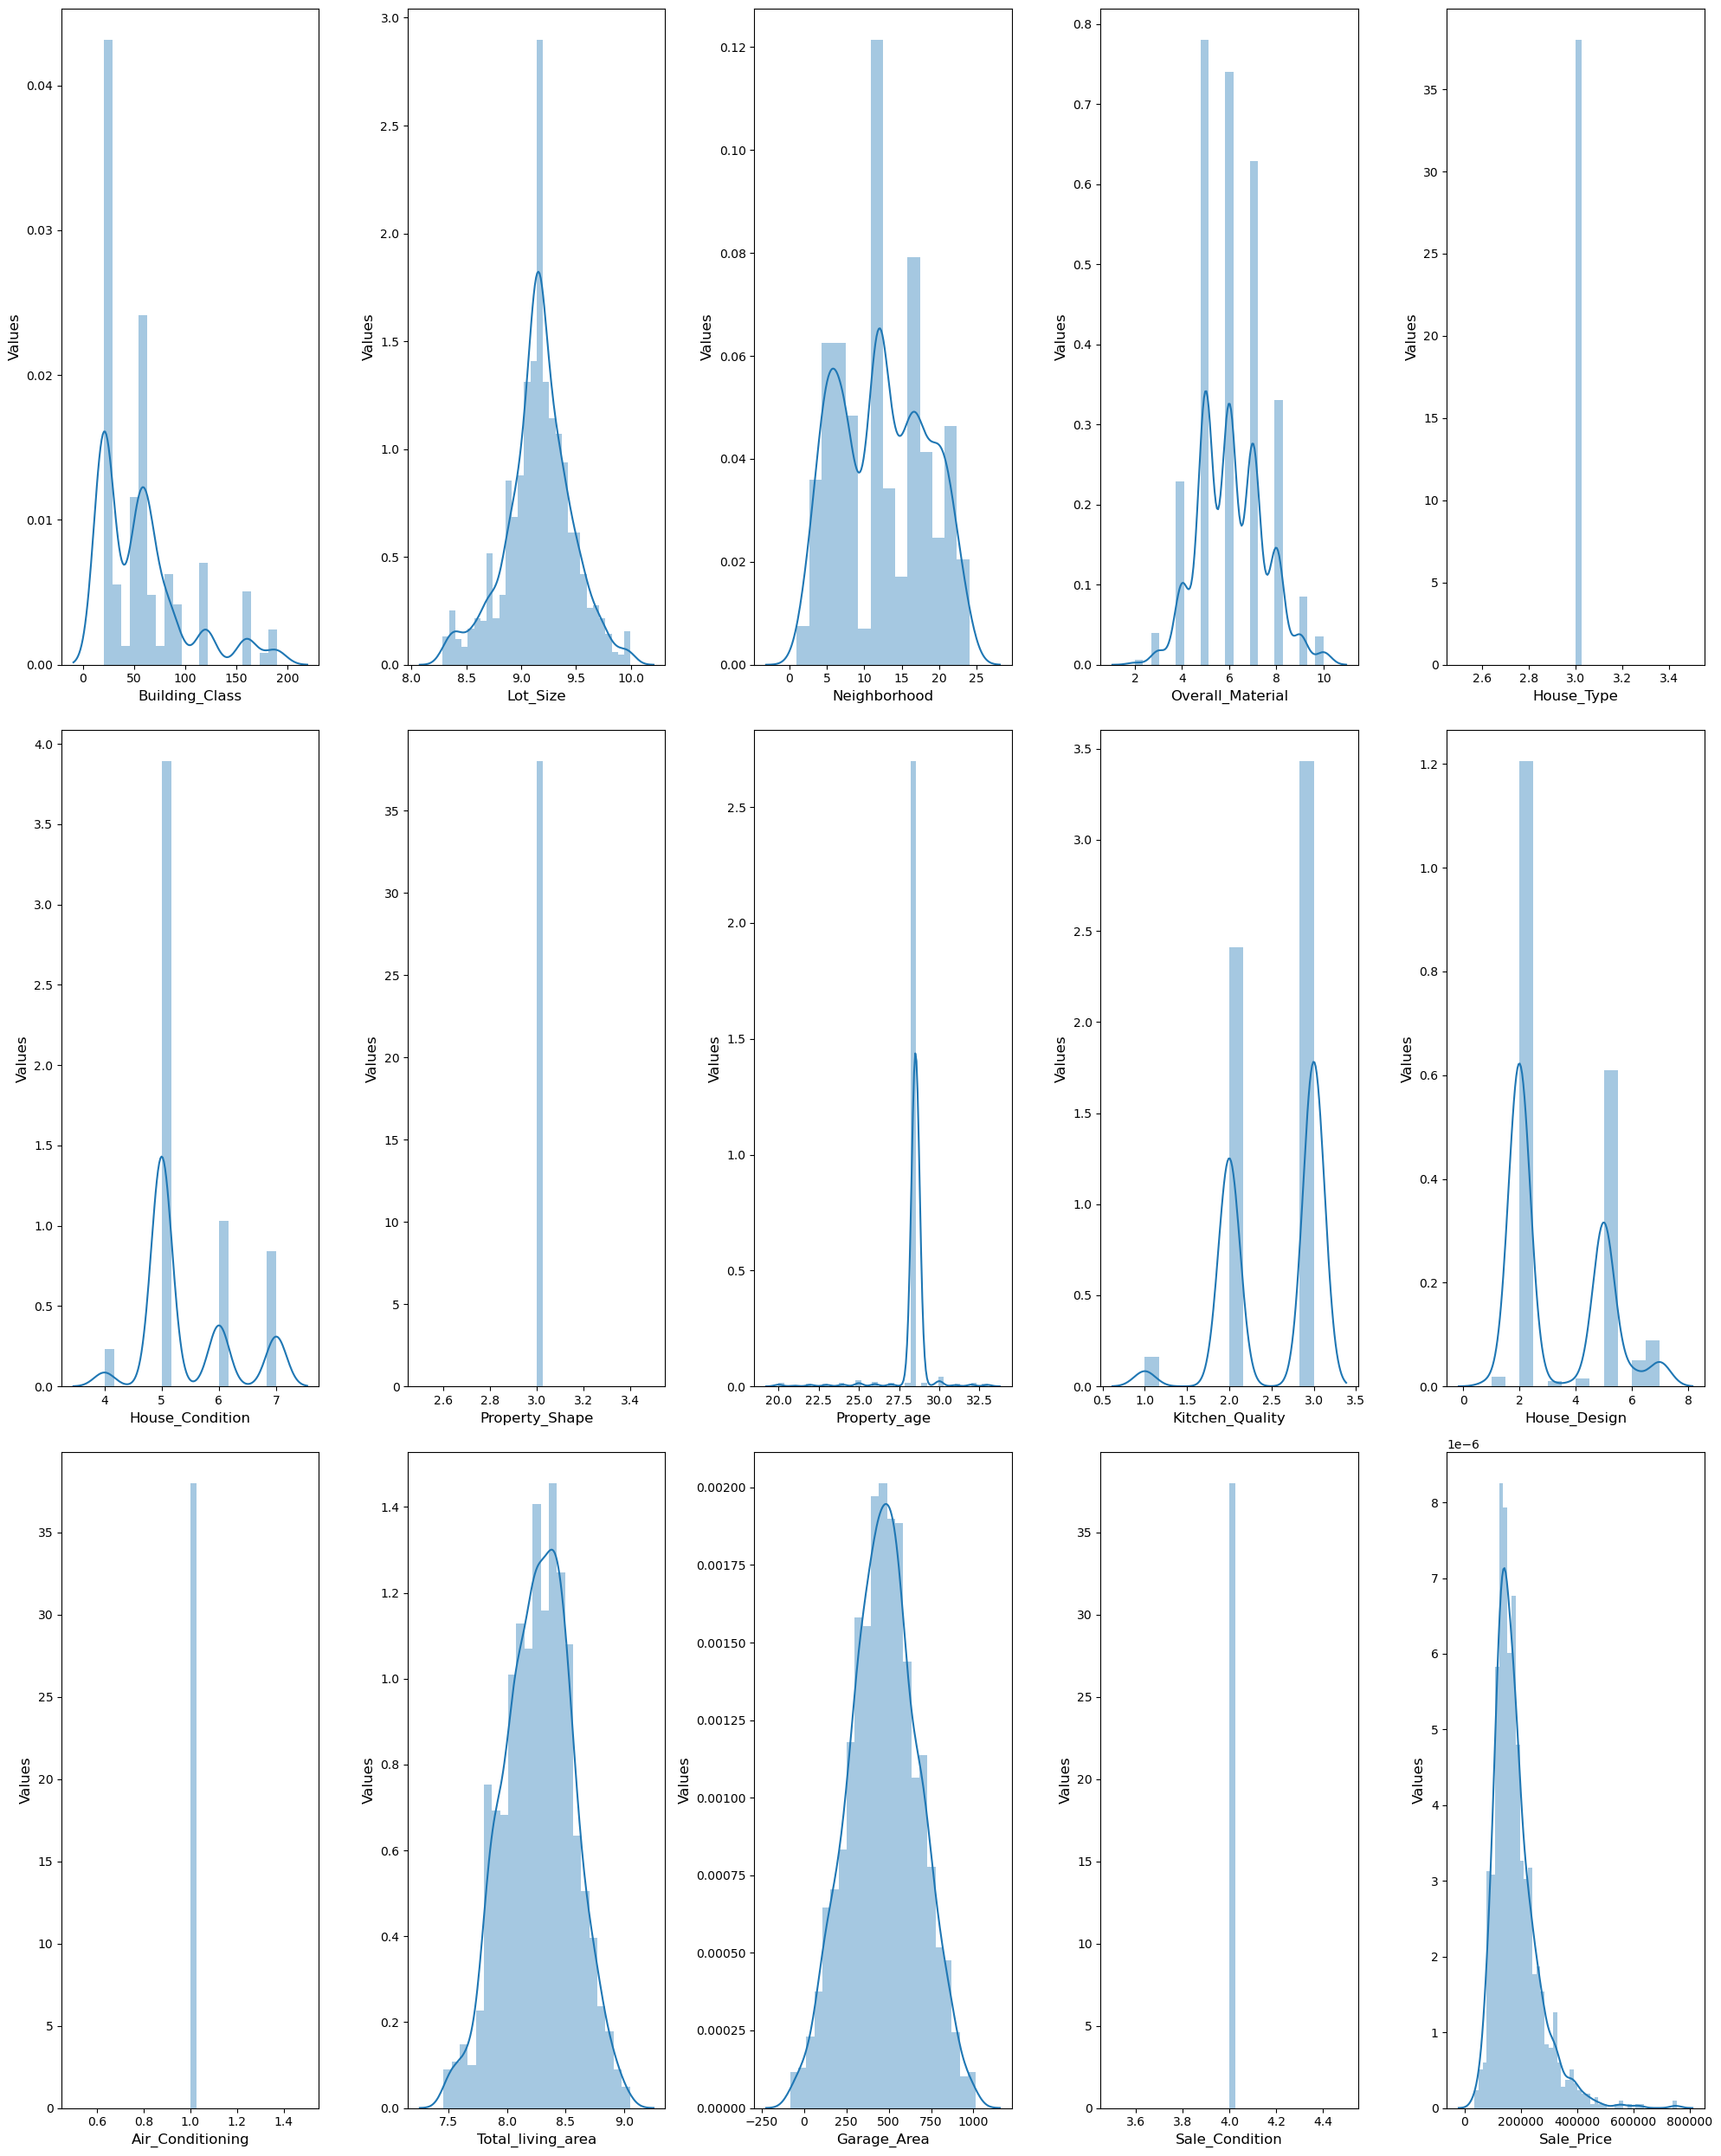

In [252]:
plt.figure(figsize=(20, 25), facecolor='white') # set figure size + background color
plotnumber = 1 # initialize

for column in  new_data:
    if plotnumber <= 15: 
        ax = plt.subplot(3,5, plotnumber)
        sns.distplot(x=new_data[column], ax=ax)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Values', fontsize=12)        
    plotnumber+=1
plt.tight_layout()
plt.show()

# Feature Scaling

In [254]:
new_data.head()

,Building_Class,Lot_Size,Neighborhood,Overall_Material,House_Type,House_Condition,Property_Shape,Property_age,Kitchen_Quality,House_Design,Air_Conditioning,Total_living_area,Garage_Area,Sale_Condition,Sale_Price
0,60,9.042040,5.0,7.0,3.0,5.0,3.0,28.524425,2.0,5.0,1.0,8.361942,471.028116,4.0,208500
1,20,9.169623,24.0,6.0,3.0,5.0,3.0,28.524425,3.0,2.0,1.0,8.240385,196.316304,4.0,181500
2,60,9.328212,5.0,7.0,3.0,5.0,3.0,28.524425,2.0,5.0,1.0,8.411166,218.068403,4.0,223500
3,70,9.164401,6.0,7.0,3.0,5.0,3.0,28.524425,2.0,5.0,1.0,8.341649,696.996439,4.0,140000
4,60,9.565284,15.0,8.0,3.0,5.0,3.0,28.524425,2.0,5.0,1.0,8.620832,568.859882,4.0,250000


In [264]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
cols_no_scale = ['House_Type', 'House_Condition',
                 'Property_Shape', 'Air_Conditioning', 'Kitchen_Quality',
                 'House_Design', 'Overall_Material', 'Sale_Condition', 'Sale_Price']
cols_to_scale = ['Neighborhood', 'Lot_Size', 'Property_age', 'Total_living_area', 'Garage_Area', 'Building_Class']
scaled_data = sc.fit_transform(new_data[cols_to_scale])

In [266]:
con_data = new_data[cols_no_scale]

In [268]:
data2 = pd.DataFrame(scaled_data, columns=['Neighborhood', 'Lot_Size', 'Property_age', 'Total_living_area', 'Garage_Area', 'Building_Class'])

In [270]:
final_df = pd.concat([data2, con_data], axis=1)

In [272]:
final_df

,Neighborhood,Lot_Size,Property_age,Total_living_area,Garage_Area,Building_Class,House_Type,House_Condition,Property_Shape,Air_Conditioning,Kitchen_Quality,House_Design,Overall_Material,Sale_Condition,Sale_Price
0,-1.261216,-0.385382,0.107429,0.319661,0.008558,0.072771,3.0,5.0,3.0,1.0,2.0,5.0,7.0,4.0,208500
1,1.979323,0.039234,0.107429,-0.099161,-1.341347,-0.873090,3.0,5.0,3.0,1.0,3.0,2.0,6.0,4.0,181500
2,-1.261216,0.567048,0.107429,0.489261,-1.234460,0.072771,3.0,5.0,3.0,1.0,2.0,5.0,7.0,4.0,223500
3,-1.090661,0.021857,0.107429,0.249741,1.118942,0.309236,3.0,5.0,3.0,1.0,2.0,5.0,7.0,4.0,140000
4,0.444331,1.356063,0.107429,1.211664,0.489293,0.072771,3.0,5.0,3.0,1.0,2.0,5.0,8.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.467659,-0.782261,0.107429,-0.212805,1.079948,-0.873090,3.0,5.0,3.0,1.0,2.0,2.0,7.0,4.0,185000
1455,-0.749552,-0.602199,0.107429,0.296241,0.859016,0.072771,3.0,5.0,3.0,1.0,3.0,5.0,6.0,4.0,175000
1456,0.273776,1.092700,0.107429,1.301799,-1.417277,-0.873090,3.0,6.0,3.0,1.0,3.0,2.0,6.0,4.0,210000
1457,-1.090661,-0.160044,0.107429,1.387866,-0.147036,0.309236,3.0,5.0,3.0,1.0,2.0,5.0,7.0,4.0,266500


# Feature Selection

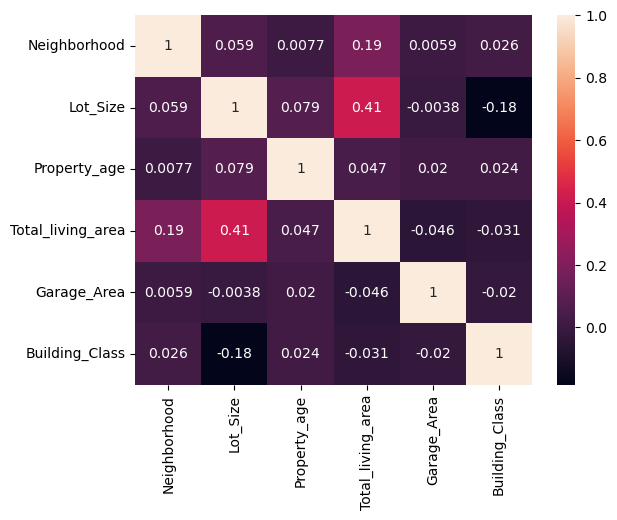

In [275]:
sns.heatmap(data2.corr(), annot=True)
plt.show()

# Model Creation 

In [278]:
# step 1: creating depending and independent variable

x = final_df.iloc[:,:-1]
y = final_df.Sale_Price

In [280]:
x

,Neighborhood,Lot_Size,Property_age,Total_living_area,Garage_Area,Building_Class,House_Type,House_Condition,Property_Shape,Air_Conditioning,Kitchen_Quality,House_Design,Overall_Material,Sale_Condition
0,-1.261216,-0.385382,0.107429,0.319661,0.008558,0.072771,3.0,5.0,3.0,1.0,2.0,5.0,7.0,4.0
1,1.979323,0.039234,0.107429,-0.099161,-1.341347,-0.873090,3.0,5.0,3.0,1.0,3.0,2.0,6.0,4.0
2,-1.261216,0.567048,0.107429,0.489261,-1.234460,0.072771,3.0,5.0,3.0,1.0,2.0,5.0,7.0,4.0
3,-1.090661,0.021857,0.107429,0.249741,1.118942,0.309236,3.0,5.0,3.0,1.0,2.0,5.0,7.0,4.0
4,0.444331,1.356063,0.107429,1.211664,0.489293,0.072771,3.0,5.0,3.0,1.0,2.0,5.0,8.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.467659,-0.782261,0.107429,-0.212805,1.079948,-0.873090,3.0,5.0,3.0,1.0,2.0,2.0,7.0,4.0
1455,-0.749552,-0.602199,0.107429,0.296241,0.859016,0.072771,3.0,5.0,3.0,1.0,3.0,5.0,6.0,4.0
1456,0.273776,1.092700,0.107429,1.301799,-1.417277,-0.873090,3.0,6.0,3.0,1.0,3.0,2.0,6.0,4.0
1457,-1.090661,-0.160044,0.107429,1.387866,-0.147036,0.309236,3.0,5.0,3.0,1.0,2.0,5.0,7.0,4.0


In [282]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
Name: Sale_Price, Length: 1459, dtype: int64

In [284]:
# step 2: creating training & Testing Model

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [286]:
# step3: model creation

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [288]:
y_pred = LR.predict(x_test)

In [294]:
y_test

1321     72500
836     153500
413     115000
522     159000
1035     84000
         ...  
479      89471
1360    189000
1414    207000
650     205950
721     143000
Name: Sale_Price, Length: 292, dtype: int64

In [296]:
y_pred

array([ 75104.40779784, 162793.8511373 , 124043.98999334, 173027.48533521,
       119560.69893949,  31765.75990188, 233863.79955532, 272237.85351144,
       273270.97032578, 161354.37259649, 200416.09827081, 206975.53643756,
       193679.96423732, 230130.5106321 , 226629.92948458, 205680.38080549,
       211049.46824991, 121381.9667159 , 124038.15486604, 222584.50373284,
       178636.42358096, 245460.19182094,  85970.92326406, 216343.60701731,
       215453.17502901, 157328.312555  , 210970.86491731,  93739.82792011,
       184934.70867714, 165015.27298956, 111381.28611741, 237300.12575617,
       207914.52953992,  90330.86821573, 132021.02992661, 207975.44045727,
       157853.05741953, 217630.89876877, 131302.03145397,  85944.58710282,
       135536.55746754, 236762.73809464,  45360.40987547, 299227.03920353,
       296926.24896942, 175248.92349775, 119827.9824417 , 125042.53136854,
       364750.55775063, 170372.45824113, 218149.23927003, 110127.73356076,
       104393.80210881, 1

In [298]:
# Step 4: Model Evalution

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
r2score = r2_score(y_test, y_pred)
r2score
# 79% of data model is predicting right

0.8119350971464709

In [300]:
# calculation of adjusted r2 score
adjusted_r2 = 1-(1-0.79)*(40-3)/(40-3-1)
adjusted_r2

0.7841666666666667

In [302]:
import math
mean_squared_error(y_test, y_pred)

988970545.1423473

In [304]:
math.sqrt(mean_squared_error(y_test, y_pred)) # root mean squared error

31447.90207855442

In [306]:
mae = mean_absolute_error(y_test, y_pred)
mae

23574.701237799287

In [308]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape * 100
# 15% error in predicting model

15.65682965245524

### First Model Evaluation Metrics

- **R² Score:** `0.799`  
  → The model explains **79.9% of the variance** in the target variable.

- **Adjusted R²:** `0.784`  
  → After adjusting for the number of predictors, **78.4% of the variation** is still explained, indicating the model fits well without much overfitting.

- **Mean Squared Error (MSE):** `116,992,894.38`  
  → Represents the **average squared difference** between predicted and actual values.

- **Root Mean Squared Error (RMSE):** `34,204.22`  
  → On average, the predictions deviate by approximately **34,204 units** from actual values.

- **Mean Absolute Error (MAE):** `24,841.69`  
  → The model’s predictions are off by about **24,842 units** on average.

- **Mean Absolute Percentage Error (MAPE):** `15.97%`  
  → The model has an **average prediction error of approximately 16%**, which is acceptable for mostwell** to unseen data.


### After Adding New Features — Model Evaluation Metrics

- **R² Score:** `0.811`  
  → The model explains **81.1% of the variance** in the target variable.

- **Adjusted R²:** `0.784`  
  → After adjusting for the number of predictors, **78.4% of the variation** is still explained, indicating the model fits well without much overfitting.

- **Mean Squared Error (MSE):** `988,970,545.14`  
  → Represents the **average squared difference** between predicted and actual values.

- **Root Mean Squared Error (RMSE):** `31,447.90`  
  → On average, the predictions deviate by approximately **31,448 units** from actual values.

- **Mean Absolute Error (MAE):** `23,574.70`  
  → The model’s predictions are off by about **23,575 units** on average.

- **Mean Absolute Percentage Error (MAPE):** `15.65%`  
  → The model has an **average prediction error of approximately 15.65%**, which is acceptable for most regression tasks.

---

### **Conclusion**
The model shows **good performance** with **high explanatory power** and **moderate error**, suggesting it **generalizes reasonably well** to unseen data.
